# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [3]:
checkpoints = r'D:\8th Semester\Machine learning\ML Labs\lab12\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [4]:
train_dir = r'D:\8th Semester\Machine learning\ML Labs\lab11\train'
validation_dir = r'D:\8th Semester\Machine learning\ML Labs\lab11\validation'
test_dir = r'D:\8th Semester\Machine learning\ML Labs\lab11\test'

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,088,452 (49.93 MB)

 Trainable params: 13,088,452 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [10]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                    callbacks=callbacks)

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.4262 - loss: 1.2696  
Epoch 1: val_loss improved from inf to 0.68358, saving model to D:\8th Semester\Machine learning\ML Labs\lab12\\E1-cp-0001-loss0.68.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - acc: 0.4284 - loss: 1.2660 - val_acc: 0.7262 - val_loss: 0.6836
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.7308 - loss: 0.6455  
Epoch 2: val_loss improved from 0.68358 to 0.44977, saving model to D:\8th Semester\Machine learning\ML Labs\lab12\\E1-cp-0002-loss0.45.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - acc: 0.7310 - loss: 0.6450 - val_acc: 0.8214 - val_loss: 0.4498
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.7962 - loss: 0.4700  
Epoch 3: val_loss did not improve from 0.44977
50/50 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - acc: 0.7960 - loss: 0.4702 - val_acc: 0.8056 - val_loss: 0.4735
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8039 - loss: 0.4262  
Epoch 4: val_loss improved from 0.44977 to 0.33911, saving model to D:\8th Semester\Machine learning\ML Labs\lab12\\E1-cp-0004-loss0.34.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - acc: 0.8043 - loss: 0.4258 - val_acc: 0.8294 - val_loss: 0.3391
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8343 - loss: 0.3777  
Epoch 5: val_loss did not improve from 0.33911
50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - acc: 0.8344 - loss: 0.3774 - val_acc: 0.7976 - val_loss: 0.4291
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8580 - loss: 0.3332  
Epoch 6: val_loss did not improve from 0.33911
50/50 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - acc: 0.8579 - loss: 0.3333 - val_acc: 0.8333 - val_loss: 0.3961
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8717 - loss: 0.2952  
Epoch 7: val_loss improved from 0.33911 to 0.28539, saving model to D:\8th Semester\Machine learning\ML Labs\lab12\\E1-cp-0007-loss0.29.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - acc: 0.8716 - loss: 0.2954 - val_acc: 0.8452 - val_loss: 0.2854
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8654 - loss: 0.2853  
Epoch 8: val_loss improved from 0.28539 to 0.27732, saving model to D:\8th Semester\Machine learning\ML Labs\lab12\\E1-cp-0008-loss0.28.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - acc: 0.8656 - loss: 0.2849 - val_acc: 0.8651 - val_loss: 0.2773
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8824 - loss: 0.2706  
Epoch 9: val_loss did not improve from 0.27732
50/50 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - acc: 0.8825 - loss: 0.2705 - val_acc: 0.8413 - val_loss: 0.2788
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8945 - loss: 0.2363  
Epoch 10: val_loss did not improve from 0.27732
50/50 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - acc: 0.8945 - loss: 0.2363 - val_acc: 0.8730 - val_loss: 0.2928


In [11]:
model_history.history

{'acc': [0.5400000214576721,
  0.7425000071525574,
  0.7831249833106995,
  0.8231250047683716,
  0.8412500023841858,
  0.8550000190734863,
  0.8687499761581421,
  0.8743749856948853,
  0.887499988079071,
  0.8993750214576721],
 'loss': [1.0869224071502686,
  0.6181379556655884,
  0.4792291522026062,
  0.4038095474243164,
  0.36183682084083557,
  0.33768296241760254,
  0.30414682626724243,
  0.26860713958740234,
  0.26664307713508606,
  0.2350572794675827],
 'val_acc': [0.726190447807312,
  0.8214285969734192,
  0.8055555820465088,
  0.829365074634552,
  0.7976190447807312,
  0.8333333134651184,
  0.8452380895614624,
  0.8650793433189392,
  0.841269850730896,
  0.8730158805847168],
 'val_loss': [0.6835771203041077,
  0.44977065920829773,
  0.4734756648540497,
  0.33911243081092834,
  0.4291285574436188,
  0.3960724472999573,
  0.2853940725326538,
  0.27732014656066895,
  0.27878108620643616,
  0.2928379774093628]}

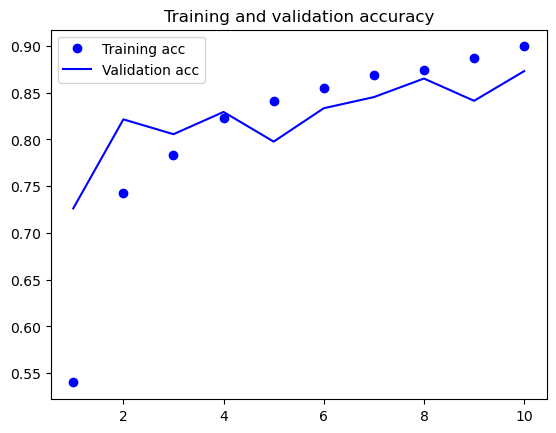

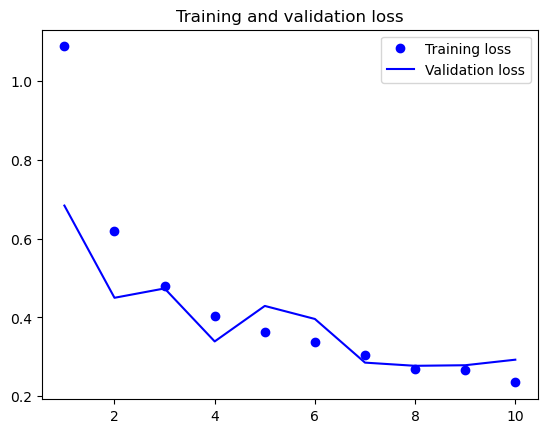

<Figure size 640x480 with 0 Axes>

In [12]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'D:\8th Semester\Machine learning\ML Labs\lab12\model_Accuracy.png')

In [13]:
model.save(r'D:\8th Semester\Machine learning\ML Labs\lab12\E1-cp-0010-loss0.26.h5')

Found 200 images belonging to 4 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 445ms/step


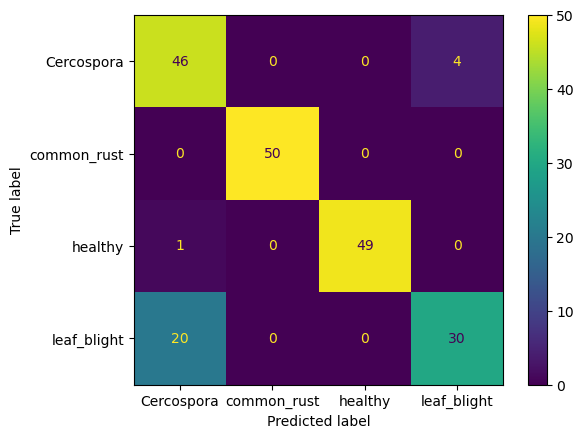

In [14]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [15]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.69      0.92      0.79        50
 common_rust       1.00      1.00      1.00        50
     healthy       1.00      0.98      0.99        50
 leaf_blight       0.88      0.60      0.71        50

    accuracy                           0.88       200
   macro avg       0.89      0.88      0.87       200
weighted avg       0.89      0.88      0.87       200

